In [1]:
from helper_loader import *

In [2]:
volume_path = Path("resources/d2783eb27223868f57e159f01ce7a1b2.npz")

In [3]:
aligned_array = np.load(volume_path)["array"]
atlas_array = load_volume(
    get_structure_mask_path("root", Resolution.MICRONS_25),
    return_raw_array=True,
)

focused_area = (
    (atlas_array.shape[0] // 5 * 2, atlas_array.shape[0] // 5 * 3),
    (atlas_array.shape[1] // 5 * 2, atlas_array.shape[1] // 5 * 3),
    (atlas_array.shape[2] // 8, atlas_array.shape[2] // 3),
)
focused_shape = (area_array := np.array(focused_area).T)[1] - area_array[0]
focused_slice = tuple(slice(focus[0], focus[1]) for focus in focused_area)

focused_array = np.zeros_like(atlas_array)
focused_array[focused_slice] = np.ones(shape=focused_shape)

aligned_array_cropped = np.where(focused_array, aligned_array, 0)
atlas_array_cropped = np.where(focused_array, atlas_array, 0)

In [4]:
results = {}
for kernel in scipy.interpolate._rbfinterp._AVAILABLE:
    results[kernel] = interpolate_sparse_3d_array(
        aligned_array_cropped,
        atlas_array_cropped,
        kernel=kernel,
    )

[2024-09-23 16:53:46] - [    INFO ] - Starting interpolation with parameters {kernel: cubic, neighbours: 27, epsilon: 1, degree: None, chunk size: 1000000, recursive: False}. (root:424)
[2024-09-23 16:53:46] - [    INFO ] - Interpolating chunk 1/1 (100%). (root:458)
[2024-09-23 16:53:50] - [    INFO ] - Failed to interpolate chunk 1. (root:472)
[2024-09-23 16:53:51] - [    INFO ] - Starting interpolation with parameters {kernel: multiquadric, neighbours: 27, epsilon: 1, degree: None, chunk size: 1000000, recursive: False}. (root:424)
[2024-09-23 16:53:51] - [    INFO ] - Interpolating chunk 1/1 (100%). (root:458)
[2024-09-23 16:54:11] - [    INFO ] - Starting interpolation with parameters {kernel: thin_plate_spline, neighbours: 27, epsilon: 1, degree: None, chunk size: 1000000, recursive: False}. (root:424)
[2024-09-23 16:54:11] - [    INFO ] - Interpolating chunk 1/1 (100%). (root:458)
[2024-09-23 16:54:15] - [    INFO ] - Failed to interpolate chunk 1. (root:472)
[2024-09-23 16:54:16

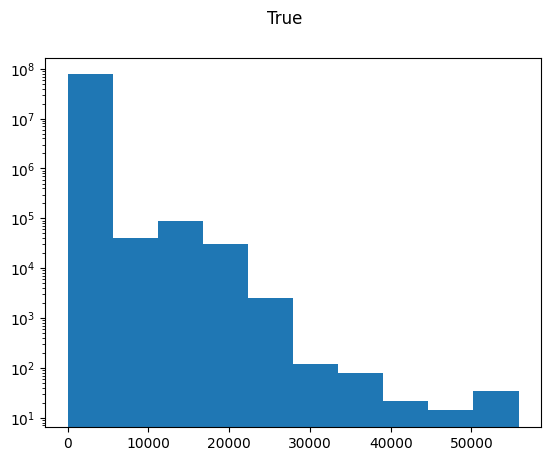

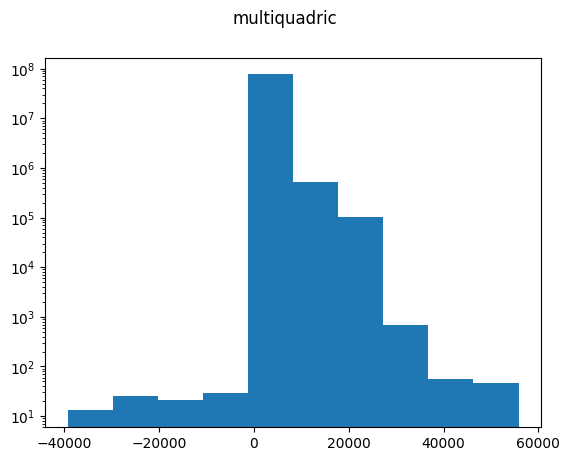

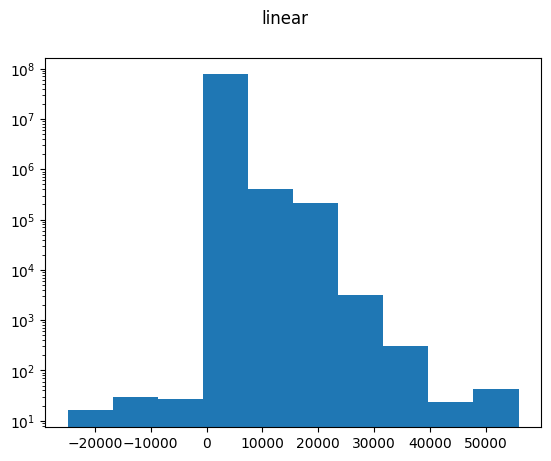

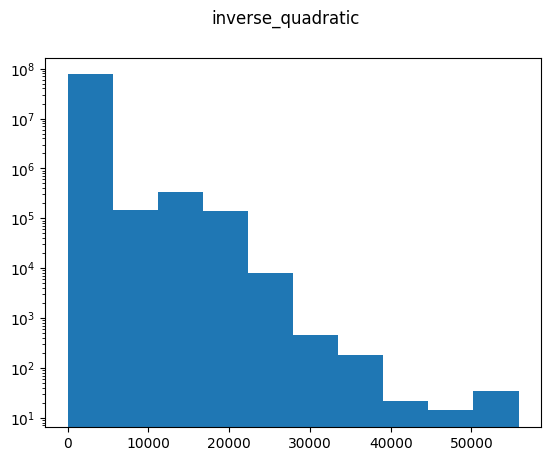

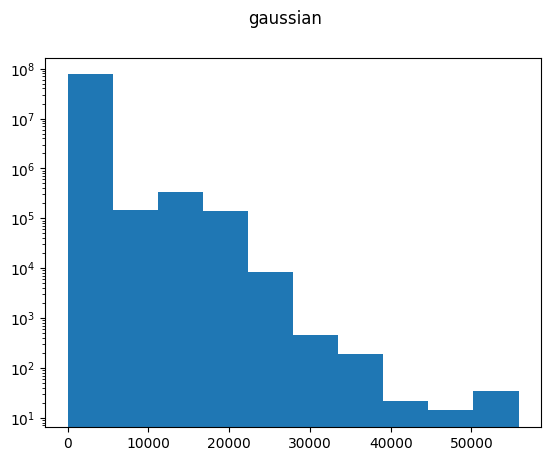

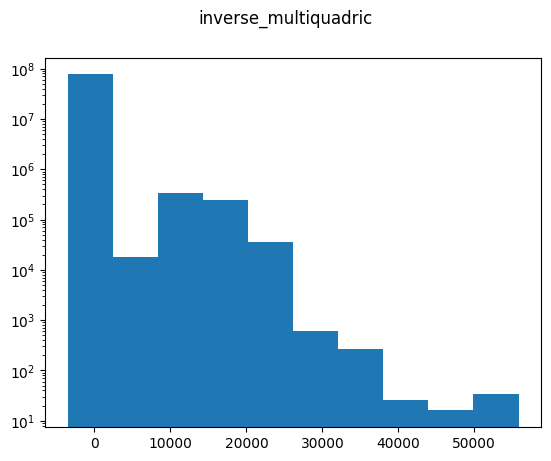

In [5]:
hist(aligned_array_cropped.flatten(), title="True", log=True)
for kernel, values in results.items():
    if kernel in ["cubic", "thin_plate_spline", "quintic"]:
        continue
    hist(values.flatten(), title=kernel, log=True)

[2024-09-23 16:56:02] - [    INFO ] - Starting interpolation with parameters {kernel: inverse_multiquadric, neighbours: 35, epsilon: 1, degree: 0, chunk size: 1000000, recursive: False}. (root:424)
[2024-09-23 16:56:02] - [    INFO ] - Interpolating chunk 1/1 (100%). (root:458)


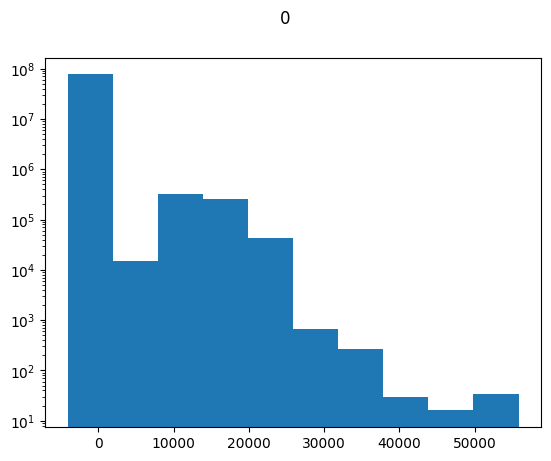

[2024-09-23 16:56:37] - [    INFO ] - Starting interpolation with parameters {kernel: inverse_multiquadric, neighbours: 35, epsilon: 1, degree: 1, chunk size: 1000000, recursive: False}. (root:424)
[2024-09-23 16:56:37] - [    INFO ] - Interpolating chunk 1/1 (100%). (root:458)
[2024-09-23 16:56:41] - [    INFO ] - Failed to interpolate chunk 1. (root:472)


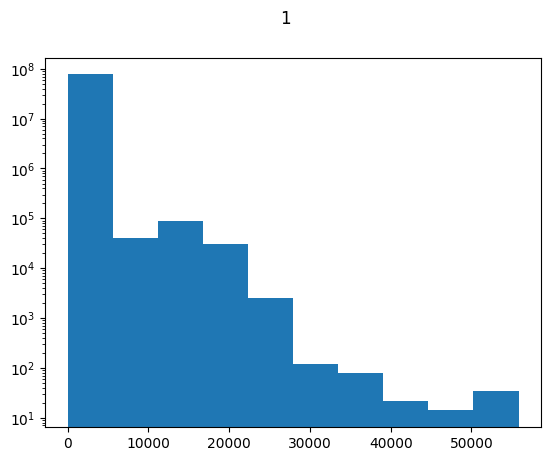

[2024-09-23 16:56:43] - [    INFO ] - Starting interpolation with parameters {kernel: inverse_multiquadric, neighbours: 35, epsilon: 1, degree: 2, chunk size: 1000000, recursive: False}. (root:424)
[2024-09-23 16:56:43] - [    INFO ] - Interpolating chunk 1/1 (100%). (root:458)
[2024-09-23 16:56:47] - [    INFO ] - Failed to interpolate chunk 1. (root:472)


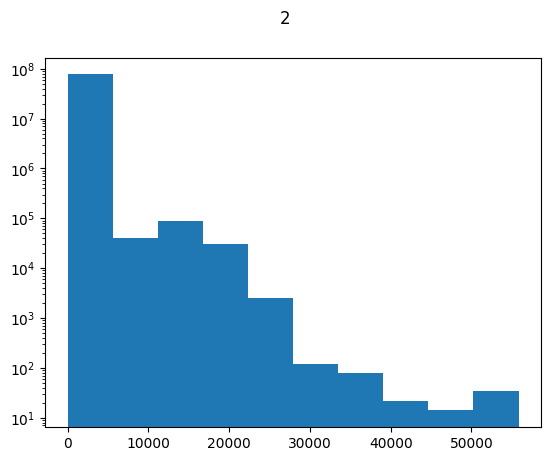

[2024-09-23 16:56:48] - [    INFO ] - Starting interpolation with parameters {kernel: inverse_multiquadric, neighbours: 35, epsilon: 1, degree: 3, chunk size: 1000000, recursive: False}. (root:424)
[2024-09-23 16:56:48] - [    INFO ] - Interpolating chunk 1/1 (100%). (root:458)
[2024-09-23 16:56:53] - [    INFO ] - Failed to interpolate chunk 1. (root:472)


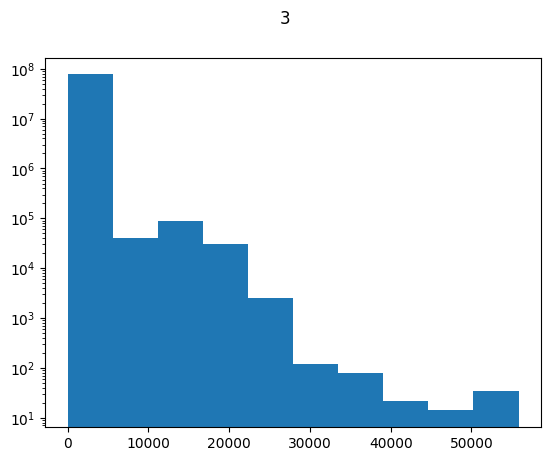

[2024-09-23 16:56:54] - [    INFO ] - Starting interpolation with parameters {kernel: inverse_multiquadric, neighbours: 35, epsilon: 1, degree: 4, chunk size: 1000000, recursive: False}. (root:424)
[2024-09-23 16:56:54] - [    INFO ] - Interpolating chunk 1/1 (100%). (root:458)
[2024-09-23 16:56:59] - [    INFO ] - Failed to interpolate chunk 1. (root:472)


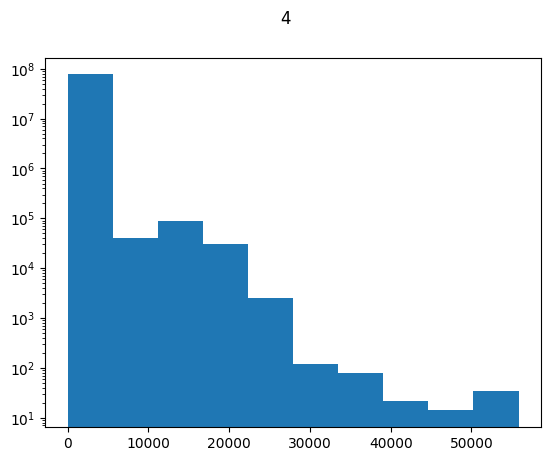

In [6]:
degree_results = {}
for degree in range(5):
    interpolated_array_inverse_multiquadric = interpolate_sparse_3d_array(
        aligned_array_cropped,
        atlas_array_cropped,
        kernel="inverse_multiquadric",
        neighbours=35,
        degree=degree,
    )
    hist(interpolated_array_inverse_multiquadric.flatten(), log=True, title=f"{degree}")

    degree_results[degree] = interpolated_array_inverse_multiquadric

In [11]:
vmin = 0
vmax = 2**16 - 1


array_aligned = aligned_array_cropped[focused_slice]
array_inverse_multiquadric_0 = degree_results[0][focused_slice]
array_inverse_multiquadric_1 = degree_results[1][focused_slice]
array_inverse_multiquadric_2 = degree_results[2][focused_slice]
array_inverse_multiquadric_3 = degree_results[3][focused_slice]
array_inverse_multiquadric_4 = degree_results[4][focused_slice]
array_difference = array_aligned - array_inverse_multiquadric_0


def update(index: int = 0) -> None:
    imshow(array_aligned[..., index].T, vmin=vmin, vmax=vmax)
    imshow(array_inverse_multiquadric_0[..., index].T, vmin=vmin, vmax=vmax)
    imshow(array_difference[..., index].T, colorbar=True)
    imshow(array_inverse_multiquadric_1[..., index].T, vmin=vmin, vmax=vmax)
    imshow(array_inverse_multiquadric_2[..., index].T, vmin=vmin, vmax=vmax)
    imshow(array_inverse_multiquadric_3[..., index].T, vmin=vmin, vmax=vmax)
    imshow(array_inverse_multiquadric_4[..., index].T, vmin=vmin, vmax=vmax)


interact(update, index=(0, 94));

interactive(children=(IntSlider(value=0, description='index', max=94), Output()), _dom_classes=('widget-intera…